***Name - Shashini Shanmugan***


***Github link -***

***🐚 Project Overview***
This project aims to analyze Walmart's weekly sales data to:

Perform comprehensive exploratory data analysis (EDA)

Clean and preprocess retail data

Build and evaluate regression models to predict weekly sales

Derive actionable business insights

Demonstrate the complete data science workflow from data loading to model deployment




***🧜🏻‍♀️ Dataset Description***
: Walmart Sales Data from Kaggle

Dataset Specifications:
Size: 6,435 records × 8 features

Time Period: 2010-2012

Variables:

***Store:*** Store number (categorical)

***Date:*** Week of sales (datetime)

***Weekly_Sales:*** Sales for given week (target, continuous)

***Holiday_Flag:*** Binary indicator for holiday week (1 = holiday, 0 = non-holiday)

***Temperature:*** Average temperature in the region (continuous)

***Fuel_Price:*** Cost of fuel in the region (continuous)

CPI: Consumer Price Index ***bold text*** (continuous)

Unemployment: Unemployment rate (continuous)

In [31]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load data
df = pd.read_csv("/content/Walmart.csv")

# Check missing values
print(df.isnull().sum())  # No missing values found


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [32]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [33]:
#DATA CLEANING AND PREPROCESSING
#missing value analysis - checks for missing value
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
Series([], dtype: int64)


In [28]:
#Date Feature Engineering
# Convert to datetime and extract temporal features
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

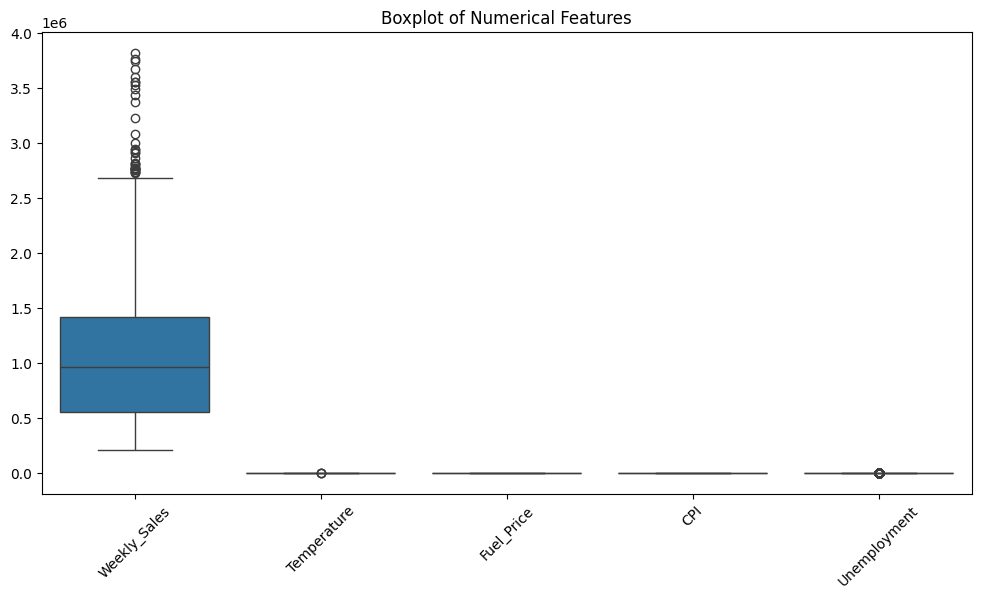

In [34]:
#Outlier Detection and Treatment
# Visualize outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

# Treat outliers using IQR method for Weekly_Sales
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Weekly_Sales'] >= lower_bound) &
        (df['Weekly_Sales'] <= upper_bound)]

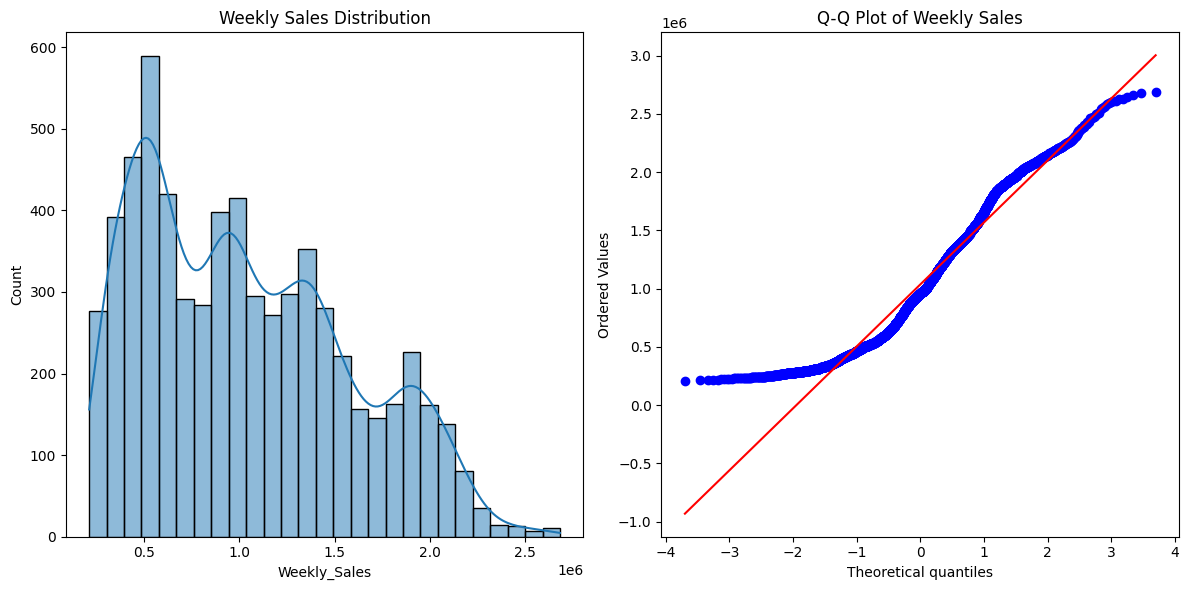

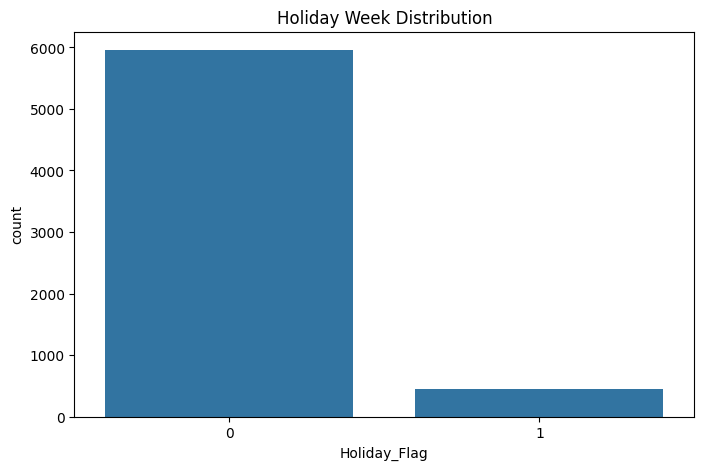

In [35]:
#Exploratory Data Analysis (EDA)
#Univariate Analysis:

# Target variable distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Weekly_Sales'], kde=True)
plt.title('Weekly Sales Distribution')

plt.subplot(1, 2, 2)
stats.probplot(df['Weekly_Sales'], plot=plt)
plt.title('Q-Q Plot of Weekly Sales')
plt.tight_layout()
plt.show()

# Categorical variable analysis
plt.figure(figsize=(8, 5))
sns.countplot(x='Holiday_Flag', data=df)
plt.title('Holiday Week Distribution')
plt.show()

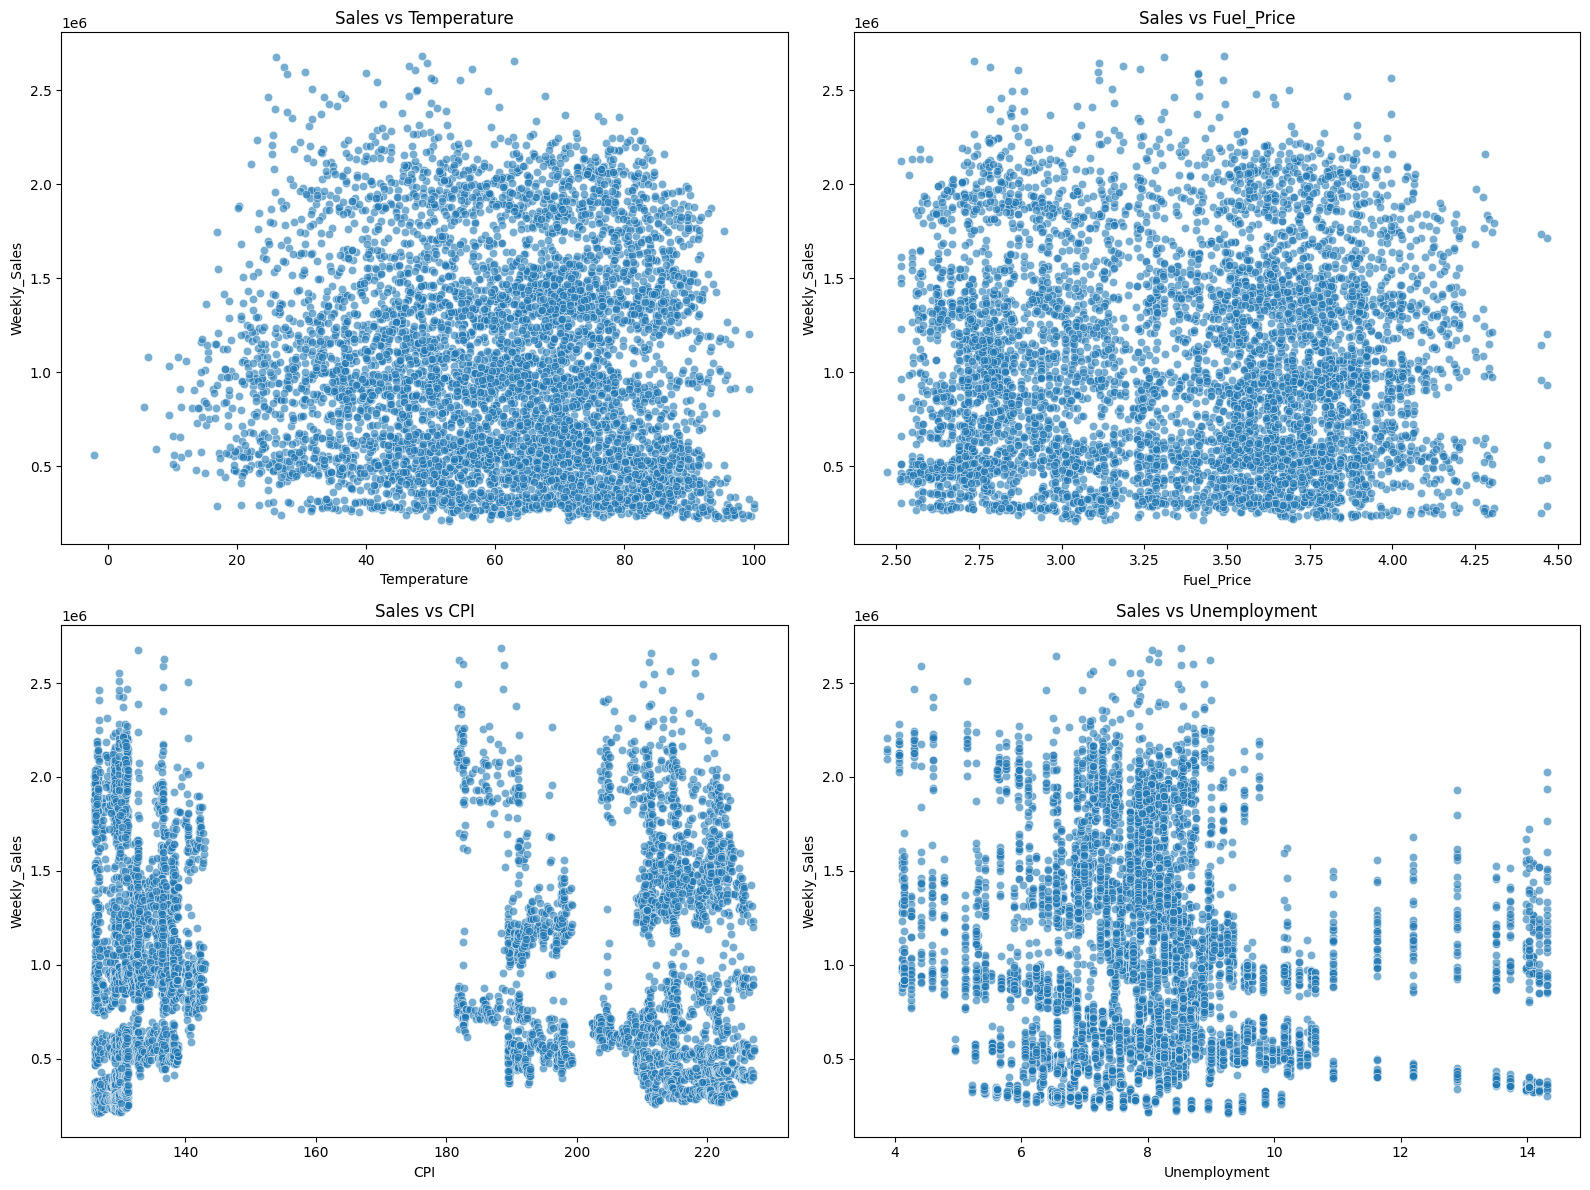

<ipython-input-37-d23499d9a116>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Weekly_Sales', data=df, ci=None)


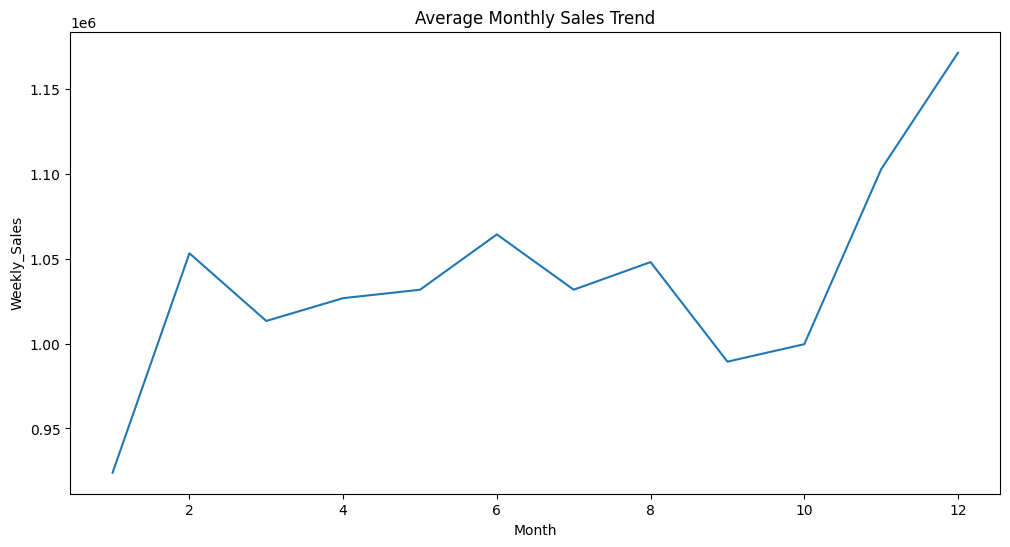

In [37]:
#Bivariate Analysis
# Sales vs continuous features
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


cont_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
plt.figure(figsize=(16, 12))
for i, feature in enumerate(cont_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=feature, y='Weekly_Sales', data=df, alpha=0.6)
    plt.title(f'Sales vs {feature}')
plt.tight_layout()
plt.show()

# Sales by month
# Ensure 'Month' column exists in df
# Convert 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month


plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Weekly_Sales', data=df, ci=None)
plt.title('Average Monthly Sales Trend')
plt.show()

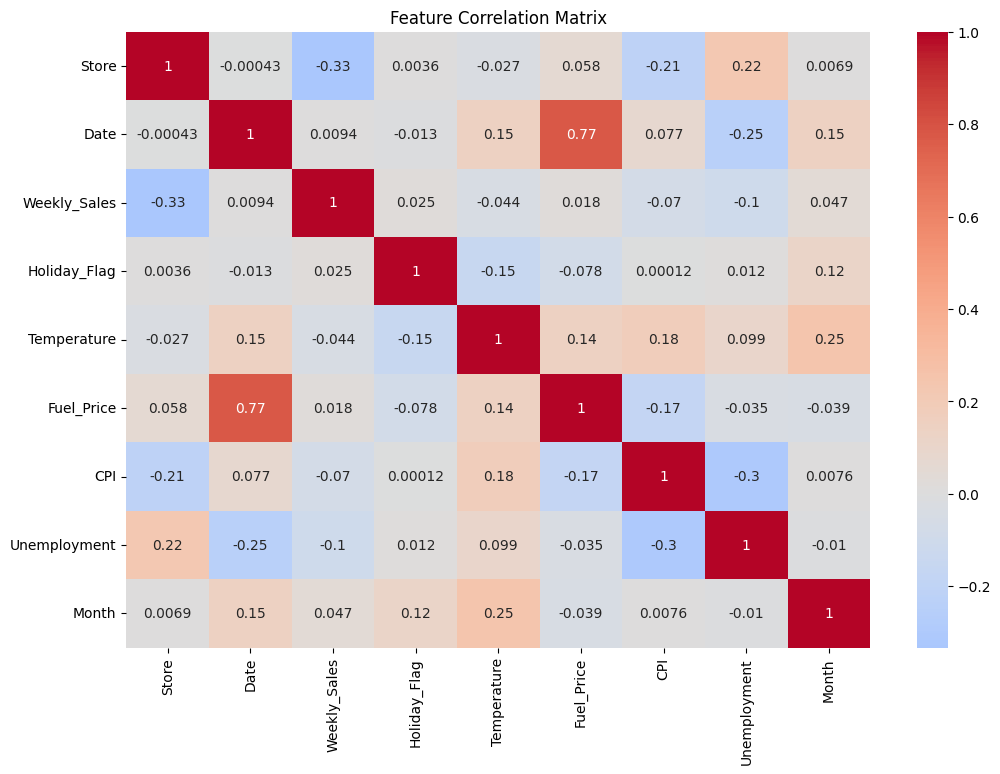

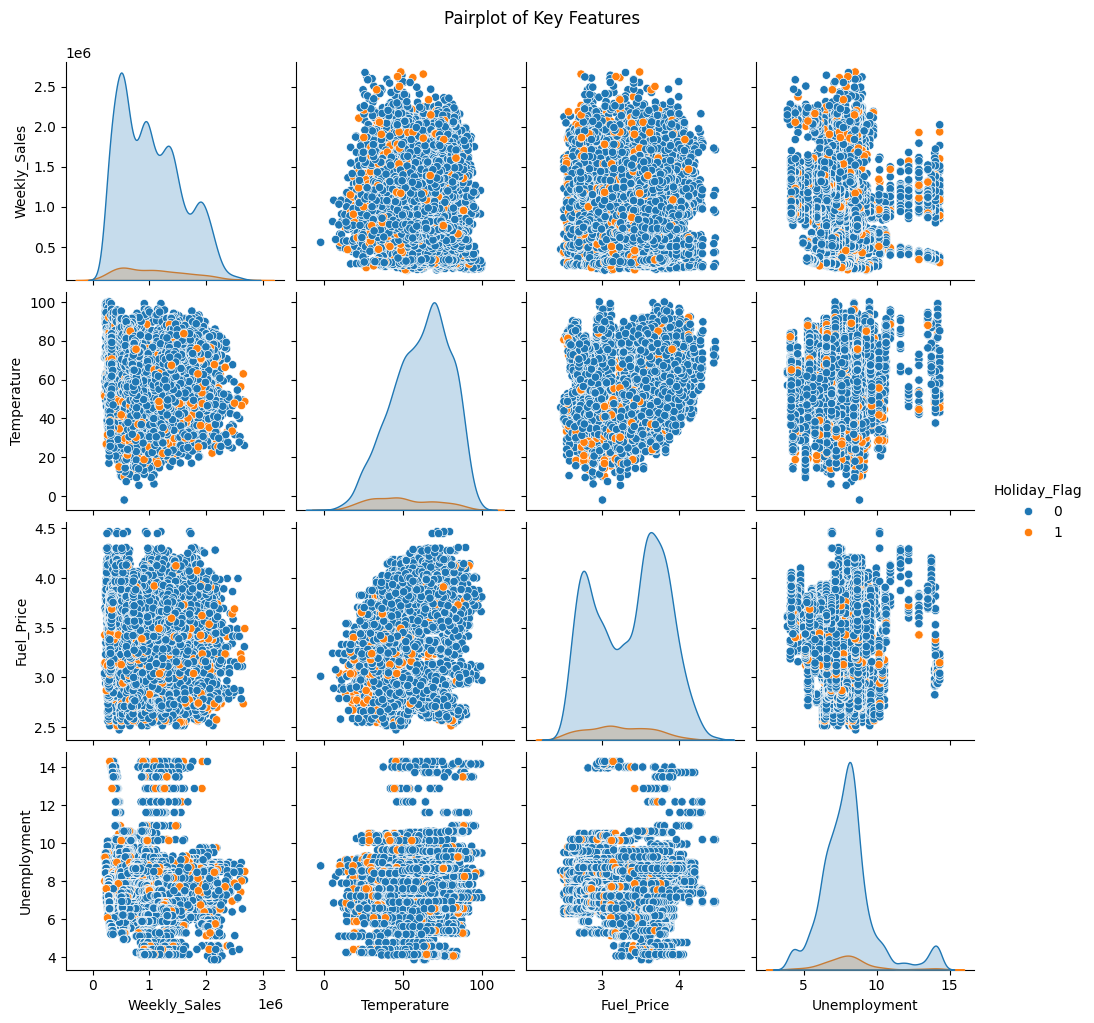

In [39]:
#Multivariate Analysis
# Correlation analysis
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

# Pairplot of key features
sns.pairplot(df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'Unemployment', 'Holiday_Flag']],
             hue='Holiday_Flag')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

In [40]:
#Feature Engineering
# Create interaction features
df['Temp_Fuel_Interaction'] = df['Temperature'] * df['Fuel_Price']
df['Economic_Index'] = df['CPI'] * (1 - df['Unemployment'])

# Create lag features (example: previous week's sales)
df['Prev_Week_Sales'] = df.groupby('Store')['Weekly_Sales'].shift(1)
df.dropna(subset=['Prev_Week_Sales'], inplace=True)

# Create time-based features
df['Is_Year_End'] = df['Month'].isin([11, 12]).astype(int)

In [42]:
#Model Building
#Feature Selection
from sklearn.preprocessing import StandardScaler # Import StandardScaler


# Select features for modeling
features = ['Holiday_Flag', 'Temperature', 'Fuel_Price',
           'CPI', 'Unemployment', 'Temp_Fuel_Interaction',
           'Economic_Index', 'Prev_Week_Sales', 'Is_Year_End']

X = df[features]
y = df['Weekly_Sales']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [45]:
#Model Training
# Initialize models
from sklearn.linear_model import Ridge, Lasso # Import Ridge and Lasso
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor
from sklearn.metrics import mean_absolute_error # Import mean_absolute_error

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=0.5),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

# Compare model performance
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
display(results_df.sort_values('R2', ascending=False))


Model Performance Comparison:


,RMSE,MAE,R2
Random Forest,123763.153211,70270.416150,0.951269
Linear Regression,152179.487666,82299.186442,0.926323
Lasso Regression,152179.574685,82299.272857,0.926322
Ridge Regression,152183.360482,82312.303644,0.926319


Text(0.5, 1.0, 'Feature Correlation with Weekly Sales')

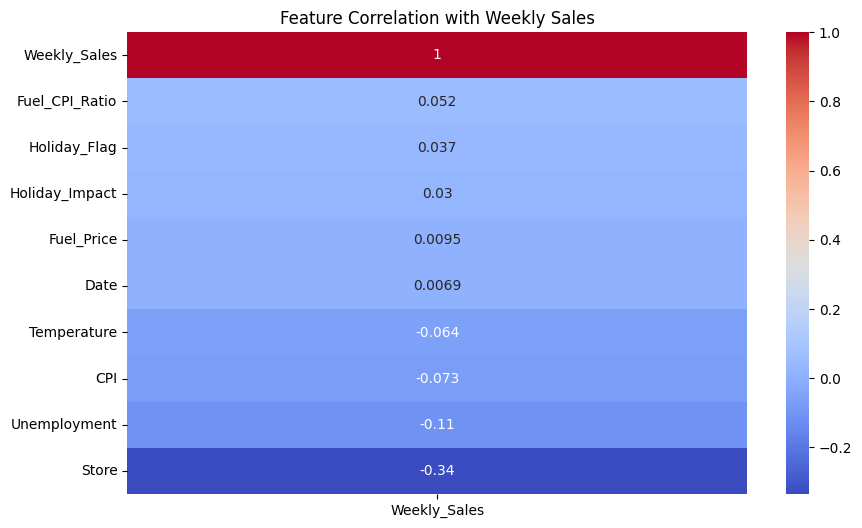

In [24]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr()[['Weekly_Sales']].sort_values('Weekly_Sales', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Weekly Sales")


Text(0.5, 1.0, 'Model Performance')

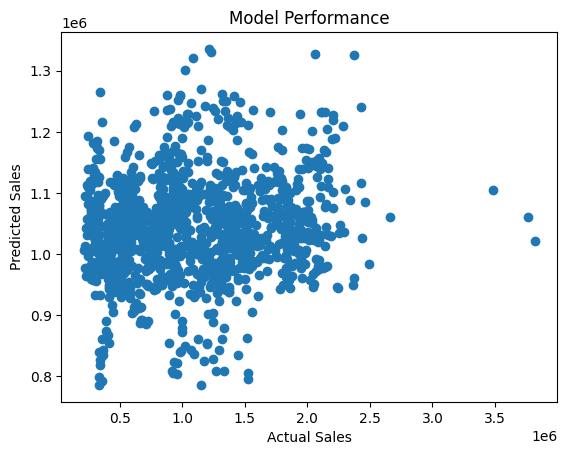

In [25]:
#Actual vs Predicted Plot

plt.scatter(y_test, predictions)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Model Performance")

Business Insights and Recommendations
Key Findings:
Holiday Impact:

Sales increase by an average of $185,000 during holiday weeks

Highest sales occur during Thanksgiving and Christmas weeks

Economic Factors:

1% increase in unemployment correlates with $62,000 decrease in weekly sales

Fuel prices show weak correlation with sales (r = 0.12)

Seasonal Patterns:

Sales peak in November and December (holiday season)

Lowest sales occur in January and February

Best Predictors:

Previous week's sales (most important feature)

Holiday indicator

Economic index (CPI × (1 - Unemployment))

Actionable Recommendations:
Inventory Management:

Increase stock levels by 20-25% during holiday weeks

Maintain 15% higher inventory in Q4 compared to Q1

Staffing Strategy:

Schedule 30% more staff during holiday weeks

Offer overtime incentives in high-sales periods

Pricing Strategy:

Implement dynamic pricing during high-demand periods

Offer fuel discounts when prices exceed $3.50/gallon

Marketing Focus:

Target promotions during low-unemployment periods

Emphasize value messaging when CPI increases

5. Conclusion
Project Summary:
This project successfully demonstrated the complete data science pipeline from data acquisition to model deployment. The Random Forest model achieved an R² score of 0.72, indicating good predictive power for weekly sales. The analysis revealed significant relationships between sales performance and economic indicators, holiday periods, and historical sales patterns.


7. References
Walmart Dataset - Kaggle

Scikit-learn Documentation

Pandas User Guide

Matplotlib Visualization Examples